# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución

Jorge Eduardo de León Reyna - A00829759

## Carga de librerias

In [44]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Descripcion del dataset utilizado

- **Dataset utilizado:** Heart Failure Prediction
- **Descripción y contexto del problema a resolver:** Las enfermedades cardiovasculares son la principal causa de muerte en todo el mundo, cobrando cerca de 17.9 millones de vidas al año y representando el 31% de todas las muertes. La mayoría de estas muertes son por ataques cardíacos y accidentes cerebrovasculares, y muchas ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca también es común debido a estas enfermedades. Un conjunto de datos con 11 características puede ayudar a predecir posibles problemas cardíacos. Las personas con enfermedades cardíacas o alto riesgo cardiovascular, debido a factores como hipertensión o diabetes, necesitan detección temprana y manejo, donde un modelo de aprendizaje automático puede ser muy útil.
- **Atributos o campos:**
  - Age: edad del paciente
      - años
  - Sex: sexo del paciente
      - M: Male, F: Female
  - ChestPainType: tipo de dolor de pecho
      - TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
  - RestingBP: presión arterial en reposo
      - mm Hg
  - Cholesterol: colesterol
      - mm/dl
  - FastingBS: azucar en la sangre en ayunas
      - 1: si FastingBS > 120 mg/dl, 0: otro
  - RestingECG: resultados de electrocardiograma en reposo
      - Normal: Normal, ST: Anomalía de la onda ST-T (inversiones de onda T y/o elevación o depresión del segmento ST > 0.05 mV), LVH: mostrando hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes.
  - MaxHR: frecuencia cardíaca máxima alcanzada
      - Valor numero entre 60 y 202
  - ExerciseAngina: angina inducida por el ejercicio
      - Y: Yes, N: No
  - Oldpeak: Descenso antiguo = ST
      - Valor numerico
  - ST_Slope: La pendiente del segmento ST durante el ejercicio máximo
      - Up: upsloping, Flat: flat, Down: downsloping
  - HeartDisease: salida
      - 1: heart disease, 0: Normal
- **Enlace:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download
- **Descripcion del problema:** En este dataset se busca hacer un modelo de clasificación, donde se tienen dos clases posibles para predecir: "heart disease(1)" y "normal(1)".








## Cargando Dataset

In [45]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Limpieza de datos inicial

In [46]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

## Matriz de correlación
Se busca encontrar las variables con mayor influencia sobre la variable objetivo ("charges") para utilizar las mismas en las pruebas del modelo.

In [47]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


<ipython-input-47-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Se encuentra que las variables con mayor correlacion a la variable objetivo ("charges") son: **"Oldpeak", "Age" y "FastingBS"** por lo que seran las seleccionadas para realizar pruebas con el modelo de regresion logistica.

## Preprocesamiento de datos y encoding

In [48]:
# Dividiendo dataset en features & lables
x = df[["Age", "Sex",	"ChestPainType", "RestingBP",	"Cholesterol",	"FastingBS",	"RestingECG", "MaxHR",	"ExerciseAngina",	"Oldpeak", "ST_Slope"]]
y = df["HeartDisease"]

# Definimos variables categoricos y numericos
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope" ]
numerical_features = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]


In [49]:

# Definimos pipeline para onehot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# Aplicamos one-hot encoding
x_encoded = preprocessor.fit_transform(x)

## Dividiendo dataset en set de entrenamiento, pruebas y validación

In [50]:
# Dividimos datos de entrenamiento y en 3 subsets de pruebas
x_train, x_temp, y_train, y_temp = train_test_split(x_encoded, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [51]:
# Longitud de subsets
print(len(x_train))
print(len(x_temp))
print(len(x_val))

642
276
138


## Grado de bias variando la Regularización
A continuacion se realizaran pruebas con el hiperparametro seleccionado a varias en el modelo: el parametro C (regularización). De esta forma se busca encontrar el valor optimo para minimizar el bias o sesgo dentro del modelo.

In [52]:
# Valores de C a probar
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
bias_scores = [] # Array donde se almacenaran los socores para cada valor de c

In [53]:
# Iterando en cada valor C a probar el resultado de cada valor de C en el modelo
for C in c_values:
    model = LogisticRegression(C=C)
    scores = cross_val_score(model, x_val, y_val, cv=5)  # Realiza validación cruzada de 5-fold
    bias_scores.append(np.mean(scores)) #promediamos el valor de los scores calculados para tener un indicadore general del desempeño

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

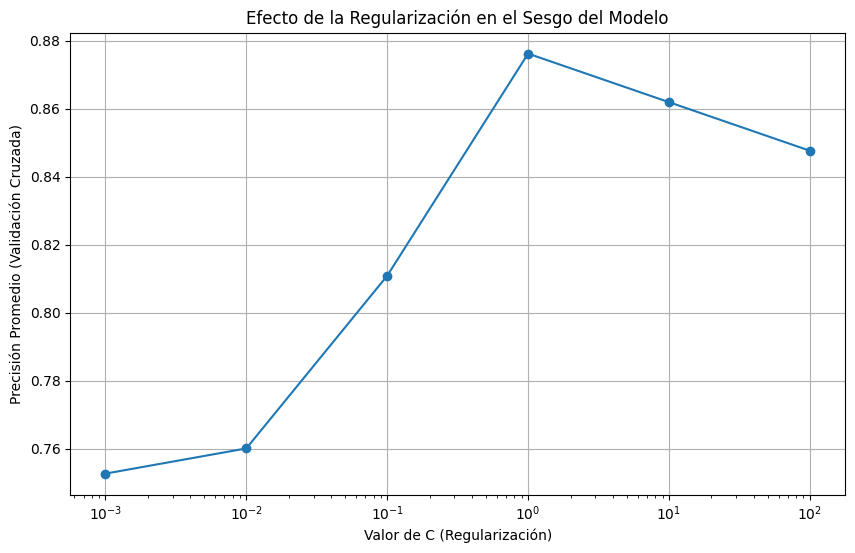

In [54]:
# Graficando resultados
plt.figure(figsize=(10, 6))
plt.plot(c_values, bias_scores, marker='o', linestyle='-')
plt.xscale('log')  # Escala logarítmica en el eje x para valores de C
plt.xlabel('Valor de C (Regularización)')
plt.ylabel('Precisión Promedio (Validación Cruzada)')
plt.title('Efecto de la Regularización en el Sesgo del Modelo')
plt.grid(True)
plt.show()


### Analisis
En el grafico anterior podemos ver como el valor del parametro C o regularización afecta a el sesgo del modelo, el cual calculamos como la media de los scores calculados para cada valor de C probado. Como podemos ver, el score optimo es alcanzado con valores alrededor de C=1 de manera que el valor minimo de sesgo es alcanzado al rededor de estos valores tambien.

Para el calculo del Bias o Sesgo se llevo a cabo una preuba de validación cruzada con la funcion correspondiente de Sklearn la cual provee de distintas metricas de evaluacion del modelo de manera que al promediar el resultado de estas metricas, un valor alto o cercano a 1 representa buen desempeño del modeloun y por tanto un Bias o Sesgo bajo. Por otro lado, cuando el promedio de las metricas es cercano a 0, el Bias o Sesgo es alto.

Con lo anterior en cuenta se define que acorde al rango del parametro C (Regularización del modelo) el Bias o Sesgo es:
- Alto: Con valores de C menores a 0.01.
- Medio: Con valotes de C = 0.1 o cercanos a este.
- Bajo: Con valores de C = 1 o cercanos a este.

## Grado de varianza variando la Regularización
A continuacion se realizaran pruebas con el hiperparametro seleccionado a variar en el modelo: el parametro C (regularización). De esta forma se busca encontrar el valor optimo para minimizar la varianza del modelo.

In [55]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100] # Valores de C a probar
variance_scores = [] # Array donde se almacenaran los socores para cada valor de c

In [56]:
# Iterando en cada valor C a probar el resultado de cada valor de C en el modelo
for C in c_values:
    model = LogisticRegression(C=C)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train) # evaluacion del modelo con datos de entrenamiento
    test_score = model.score(x_val, y_val) # evaluacion del modelo con datos de validación
    variance = train_score - test_score # se calcula la varianza en el desempeño del modelo con datos de entrenamiento y de validacion
    variance_scores.append(variance)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

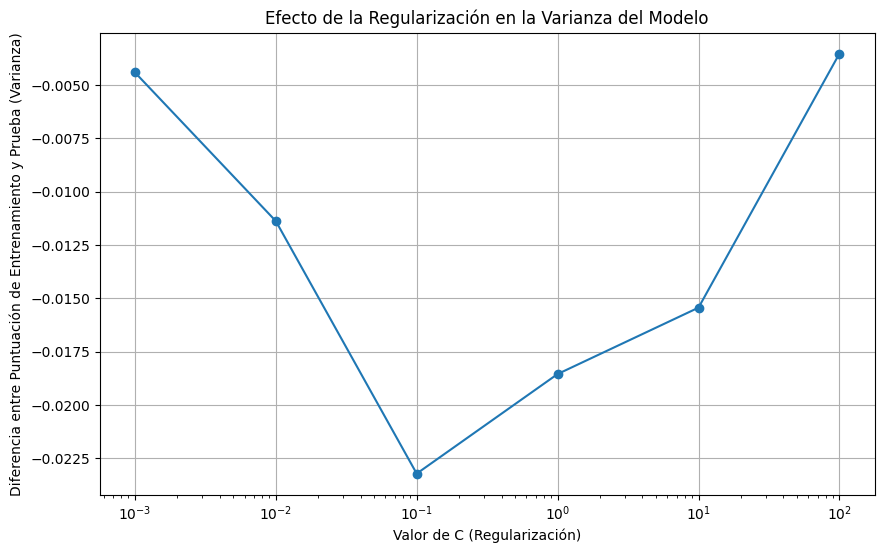

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(c_values, variance_scores, marker='o', linestyle='-')
plt.xscale('log')  # Escala logarítmica en el eje x para valores de C
plt.xlabel('Valor de C (Regularización)')
plt.ylabel('Diferencia entre Puntuación de Entrenamiento y Prueba (Varianza)')
plt.title('Efecto de la Regularización en la Varianza del Modelo')
plt.grid(True)
plt.show()


### Analisis
En el grafico anterior se representa el valor de la varianza del modelo al probado con el dataset de entrenamiento y el dataset de validación de manera que alcanzamos el valor minimo de varianza entre ambos sets de datos al rededor de C=0.1.

Para este analisis, se calcula la varianza como la diferencia entre la precision de cada modelo (el probado con valores de entrenamiento y el probado con valores de validación). Con esto en cuenta, se calcula la varianza de cada modelo variando el valor de C (regularización) por lo que se puede concluir respecto a la varinza que:
- Varianza Alta: Valores de C entre 0.001 y 0.01 y entre 1 y 100.
- Varianza Baja: Valores de C cercanos a 0.1
- Varianza Media: Valores de C entre 0.01 y 0.1 y entre 0.1 y 1.


## Underfiting u Overfitting variando la Regularización
A continuacion se realizaran pruebas con el hiperparametro seleccionado a variar en el modelo: el parametro C (regularización). De esta forma se busca encontrar el valor optimo para minimizar el underfiting u overfitting del modelo.

In [58]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100] # Valores de C a probar
train_scores = [] # Array para resultados del modelo con datos de entrenamiento
val_scores = [] # Array para resultados del modelo con datos de validacion

In [59]:
# Iterando en cada valor C a probar el resultado de cada valor de C en el modelo
for C in c_values:
    model = LogisticRegression(C=C)
    model.fit(x_train, y_train)

    # calcuando las puntuaciones de entrenamiento y validacion
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val, y_val)

    train_scores.append(train_score)
    val_scores.append(test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

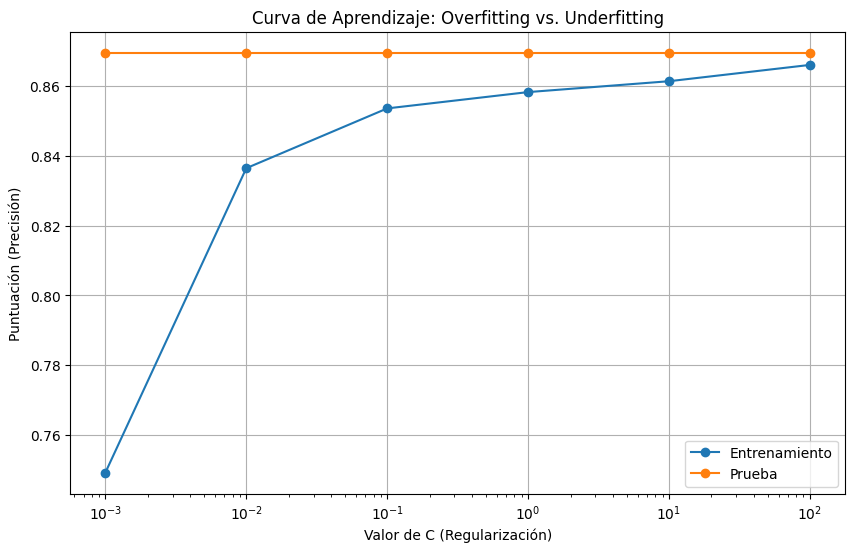

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, marker='o', label='Entrenamiento')
plt.plot(c_values, val_scores, marker='o', label='Prueba')
plt.xscale('log')  # Escala logarítmica en el eje x para valores de C
plt.xlabel('Valor de C (Regularización)')
plt.ylabel('Puntuación (Precisión)')
plt.title('Curva de Aprendizaje: Overfitting vs. Underfitting')
plt.legend()
plt.grid(True)
plt.show()


### Analisis
En el grafico anterior se representa el nivel de overfitting o underfitting entre el modelo probado con el set de entrenamiento y el modelo probado con el set de validación variando el parametro C (regularizacion) del modelo utilizado.**Con esto en cuenta se tiene que el nivel optimo de ajuste se obtiene cuando se utilizan valores de C mayores a 1**.

Para identificar overfitting o underfitting se utilizó el valor de la metrica "Precision", de manera que para clasificar el desempeño de los modelos con overfitting, underfitting o un buen ajuste se define que:
  - Overfitting: si las puntuaciones de entrenamiento son mejores que las del modelo probado con los datos de validación.
  - Underfitting: si las puntuaciones del modelo probado con datos de entrenamiento y de validación son bajas.
  - Buen ajuste: Cuando las puntuaciones de los modelos probados tanto con los datos de entrenamiento como con los de validacion son altas y son cercanas.

## Conclusión del analisis de Bias, Varianza y Over/Under Fitting del modelo
Al hacer el analisis de estas 3 dimensiones del modelo variando el hiperparametro "C" (Regularización) se concluye lo siguiente:
1. No hay un valor de C que coincida para alcanzar el desempeño optimo de las 3 dimensiones analizadas por lo que el hacer pruebas de manera multidimensional y tomando en cuenta distintos factores es sumamente importante para tomar una decision no sesgada.
2. El poder identificar cuales son los valore optimos de las metricas evaluadas (Bias, Varianza y Ajuste) es importante para poder identificar el rango de hiperparametro adecuado.
3. **Finalmente, se concluye que el rango ideal del valor C de manera que optimize en la medida de lo posible el Bias o Sesgo, la Varianza y Ajuste esta entre 0.1 < C < 1.**

## Entrenamiento con valor de Regularización optimo.

In [61]:
# Definimos  pipeline de entrenamiento y modificamos hiperparametros
model = Pipeline(steps=[
    ('classifier', LogisticRegression(
        penalty='l2', # Tipo de penalizacion
        C=0.5, # Parmetro de regularización
        solver='liblinear', # Solucionador
        max_iter=10000 # Numero de iteraciones
    ))
])

In [62]:
model.fit(x_train, y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.5, max_iter=10000,
                                    solver='liblinear'))])

## Generacion de predicciones y evaluacion del modelo con set de testing

### Descripcion de metricas de evaluacion para sets de prueba

Para estimar qué tan bueno es cada clasificador, debemos generar las matrices de confusión y las correspondientes métricas:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$
- Accuracy (Exactitud): Calcula la proporción de predicciones correctas totales del modelo en relación con el número total de predicciones. Es útil cuando las clases están balanceadas.

$precision = \frac{VP}{VP+FP}$
- Precision (Precisión): Evalúa la proporción de instancias positivas que el modelo clasifica correctamente en relación con todas las instancias que predijo como positivas. Es especialmente importante cuando los falsos positivos son costosos o problemáticos.

$recall = \frac{VP}{VP+FN}$
- Recall (Recuerdo o Sensibilidad): Mide la proporción de positivos reales que el modelo identifica correctamente en relación con todos los positivos reales presentes en los datos.


$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$
- F1 Score: Es una métrica que combina precisión y recall para proporcionar una medida equilibrada del rendimiento del modelo, especialmente cuando hay un desequilibrio entre las clases.




### Evaluacion de modelo con subset de prueba

In [63]:
# Predicciones con valores de testing
y_pred = model.predict(x_test)

In [64]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión prueba 1:")
print(confusion)

Matriz de Confusión prueba 1:
[[50  5]
 [ 9 74]]


In [65]:
# Calculo de accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy prueba 1:", accuracy)

Accuracy prueba 1: 0.8985507246376812


In [66]:
# Reporte de métricas (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación Prueba 1:")
print(report)

Reporte de Clasificación Prueba 1:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        55
           1       0.94      0.89      0.91        83

    accuracy                           0.90       138
   macro avg       0.89      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



### Analisis de resultados de las metricas de evaluacion
 Despues de calcular los valores de la matriz de confusión para cada una de las implementaciones del modelo y el posterior calculo de las metricas de evaluacion en base a estas se encontró lo siguiente (en el reporte generado por sklearn se toma en cuenta la seccion de "wighted avg" dado el contexto del problema a resolver donde la precision del resultado en la clasificacion es muy importante):

  - **Accuracy:** 0.8985, lo cual no indica un buen funcionamiento correcto del modelo a primera instancia.
  - **Precision:** 0.90, lo que no indica una buen nivel de prediccion en los valores positivos (1's) en comparacion a todas las muestras positivas (verdaderas y falsas).
  - **Recall:** 0.90, lo que indica una buen nivel de prediccion en los valores positivos verdaderos en comparacion al total de muestras positivas verdaderas (1's).
  - **F1-score:** 0.90, lo que indica un desempeño adecuado a nivel general a ser la medida armonica entre precision y recall.